**Actividad Práctica: EDA - Conceptos Básicos de Estadística Descriptiva**

**Información de data set**

El conjunto de datos para el ejercicio, fue tomado de:

 https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

De acuerdo con la información proporcionada en la página, este conjunto de datos registra los puntajes alcanzados por los estudiantes en distintas materias académicas.

**1. Cargar el data set**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


**2. Lectura del data set**

In [ ]:
import pandas as pd
import numpy as np

# Cargar dataset
df = pd.read_csv("StudentsPerformance.csv")
df



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


**3. Análisis Inicial de Datos (IDA)**

**3.1. Detección y tratamiento de valores faltantes o erróneos**

Valores faltantes - Variables numéricas:
math score       0
reading score    0
writing score    0
dtype: int64

Valores faltantes - Variables categóricas:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
dtype: int64

Mapa de calor de valores faltantes:


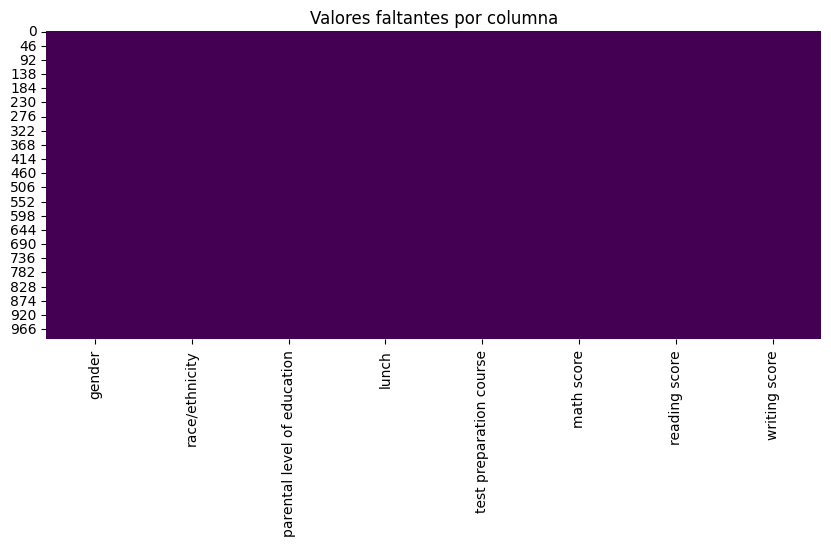


Verificación final - Valores faltantes por columna:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Primeras filas del DataFrame limpio:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Clasificar variables
numericas = ['math score', 'reading score', 'writing score']
categóricas = ['gender', 'race/ethnicity', 'parental level of education','lunch', 'test preparation course']

# 3. Detectar valores faltantes
print("Valores faltantes - Variables numéricas:")
print(df[numericas].isnull().sum())

print("\nValores faltantes - Variables categóricas:")
print(df[categóricas].isnull().sum())

# 4. Visualizarlos con heatmap
print("\nMapa de calor de valores faltantes:")
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valores faltantes por columna")
plt.show()

# 5. Imputar faltantes

# Numéricas: imputar con mediana
for col in numericas:
    if df[col].isnull().sum() > 0:
        mediana = df[col].median()
        df[col] = df[col].fillna(mediana)
        print(f"{col} imputada con la mediana → {mediana}")

# Categóricas: imputar con moda
for col in categóricas:
    if df[col].isnull().sum() > 0:
        moda = df[col].mode()[0]
        df[col] = df[col].fillna(moda)
        print(f"{col} imputada con la moda → '{moda}'")

# 6. Verificación final
print("\nVerificación final - Valores faltantes por columna:")
print(df.isnull().sum())

# 7. Mostrar las primeras filas del DataFrame limpio
print("\nPrimeras filas del DataFrame limpio:")
print(df.head())

**3.2. Detección y tratamiento de valores atípicos (outliers)**

**Variables numéricas**


 Variable: math score
 - Valores atípicos detectados: 8


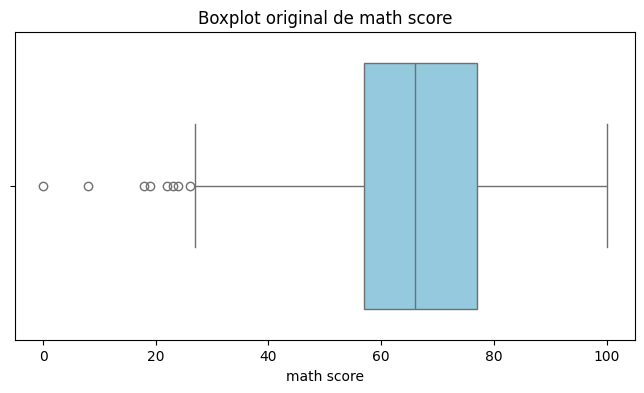

 - Outliers imputados con la media (sin outliers): 66.48


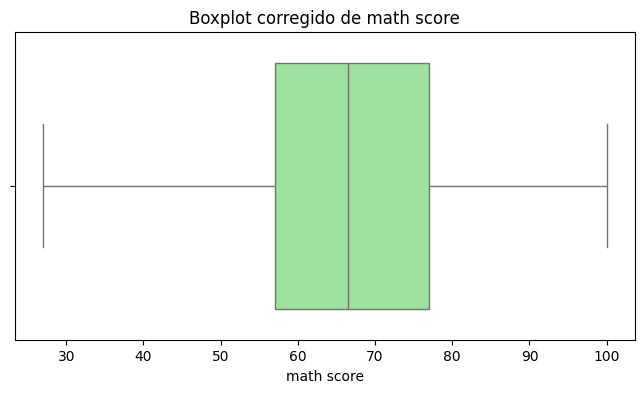


 Variable: reading score
 - Valores atípicos detectados: 6


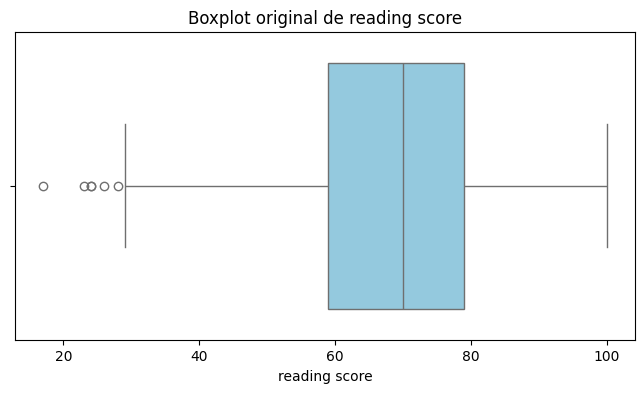

 - Outliers imputados con la media (sin outliers): 69.44


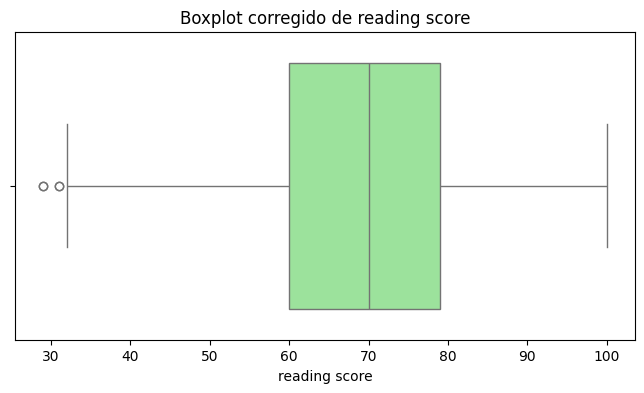


 Variable: writing score
 - Valores atípicos detectados: 5


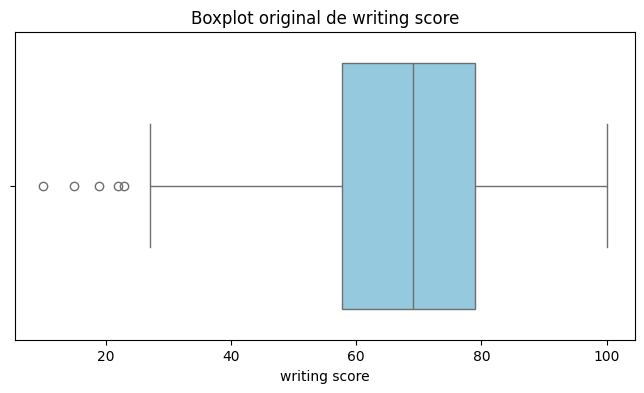

 - Outliers imputados con la media (sin outliers): 68.31


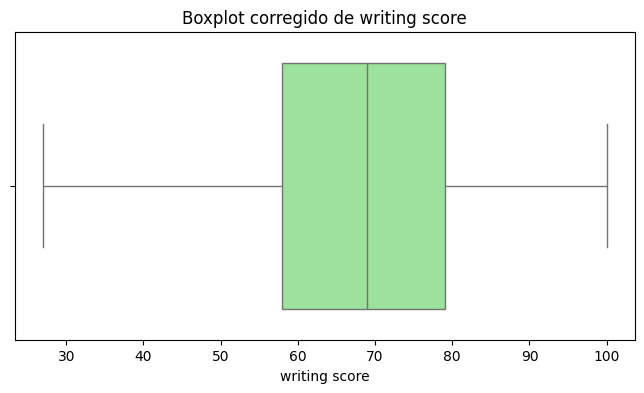

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Asegurar que los nombres de columnas estén limpios
df.columns = df.columns.str.strip()

# Variables numéricas a evaluar
numericas = ['math score', 'reading score', 'writing score']

# Función para detectar outliers usando IQR y retornar también los límites
def detectar_outliers_iqr(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    inferior = Q1 - 1.5 * IQR
    superior = Q3 + 1.5 * IQR
    outliers = serie[(serie < inferior) | (serie > superior)]
    return outliers, inferior, superior

# Iterar por cada variable
for col in numericas:
    print(f"\n Variable: {col}")

    # Detección de outliers
    outliers, inferior, superior = detectar_outliers_iqr(df[col])
    print(f" - Valores atípicos detectados: {len(outliers)}")

    # Boxplot original
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot original de {col}")
    plt.xlabel(col)
    plt.show()

    # Imputar los outliers por la media sin outliers
    media_sin_outliers = df.loc[(df[col] >= inferior) & (df[col] <= superior), col].mean()
    df[col] = df[col].apply(lambda x: media_sin_outliers if x < inferior or x > superior else x)
    print(f" - Outliers imputados con la media (sin outliers): {media_sin_outliers:.2f}")

    # Boxplot después de imputación
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f"Boxplot corregido de {col}")
    plt.xlabel(col)
    plt.show()

**Variables categóricas**

In [ ]:
# Asegurar que los nombres de columnas estén limpios
df.columns = df.columns.str.strip()

# Identificar columnas categóricas (tipo object)
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Limpiar y estandarizar cada columna categórica
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

# Verificar los resultados
print("Valores únicos por columna categórica después de limpiar:")
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

Valores únicos por columna categórica después de limpiar:
gender: ['Female' 'Male']
race/ethnicity: ['Group B' 'Group C' 'Group A' 'Group D' 'Group E']
parental level of education: ["Bachelor'S Degree" 'Some College' "Master'S Degree" "Associate'S Degree"
 'High School' 'Some High School']
lunch: ['Standard' 'Free/Reduced']
test preparation course: ['None' 'Completed']


**3.3 Reajuste de los tipos de variables**

In [ ]:
print(df.dtypes)

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object


In [ ]:
from pandas.api.types import CategoricalDtype

#Convertir todas las variables object a tipo categórico
cols_object = df.select_dtypes(include='object').columns.tolist()
for col in cols_object:
    df[col] = df[col].astype('category')
print(df.dtypes)

#Convertir Puntuación de matemáticas, puntuación de lectura, puntuación en escritura
# Convertir las tres variables numéricas a entero
cols_numericas = ['math score', 'reading score', 'writing score']
df[cols_numericas] = df[cols_numericas].astype(int)



gender                         category
race/ethnicity                 category
parental level of education    category
lunch                          category
test preparation course        category
math score                      float64
reading score                   float64
writing score                   float64
dtype: object


**4. Análisis Exploratorio de Datos (EDA)**

**4.1. Análisis Descriptivo**

**4.1.1. Univariado**

Tablas de frecuencias - Gráficos

**Variables numéricas**


 Análisis descriptivo Variables numéricas: math score
count    1000.00
mean       66.48
std        14.50
min        27.00
25%        57.00
50%        66.00
75%        77.00
max       100.00
Name: math score, dtype: float64
Asimetría: -0.07
Curtosis: -0.30


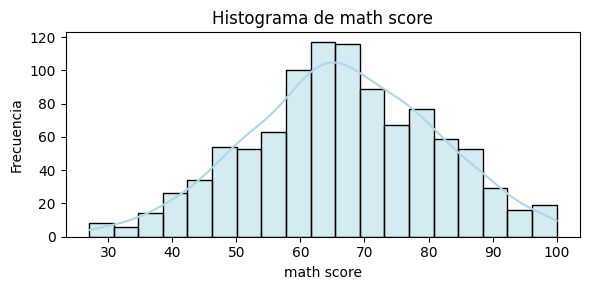

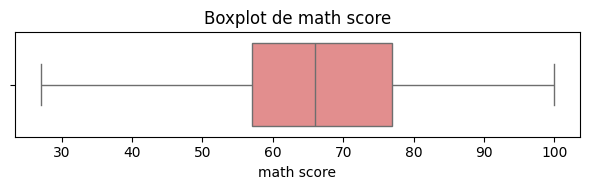


 Análisis descriptivo Variables numéricas: reading score
count    1000.00
mean       69.45
std        14.16
min        29.00
25%        60.00
50%        70.00
75%        79.00
max       100.00
Name: reading score, dtype: float64
Asimetría: -0.14
Curtosis: -0.35


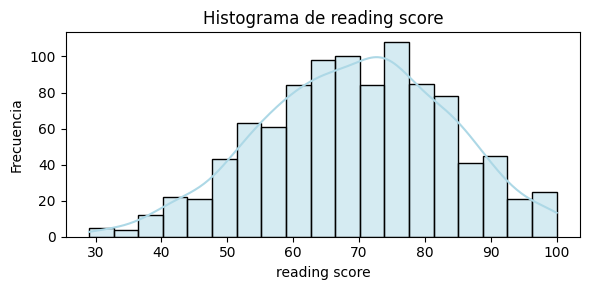

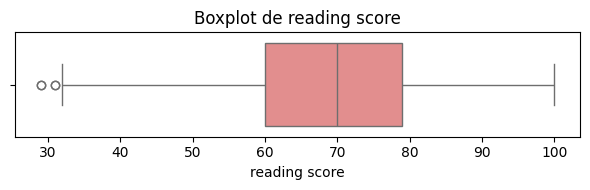


 Análisis descriptivo Variables numéricas: writing score
count    1000.00
mean       68.31
std        14.77
min        27.00
25%        58.00
50%        69.00
75%        79.00
max       100.00
Name: writing score, dtype: float64
Asimetría: -0.16
Curtosis: -0.38


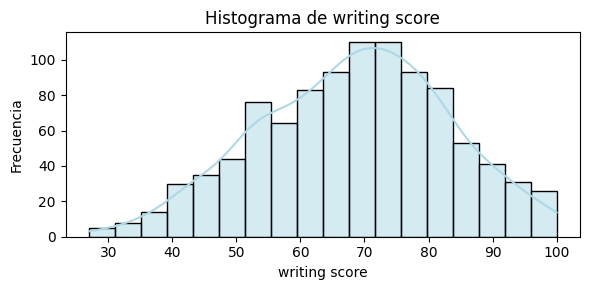

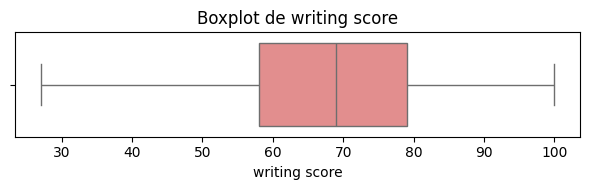

In [ ]:
# Variables numéricas del dataset
numericas = ['math score', 'reading score', 'writing score']

# Recorrer cada variable numérica
for col in numericas:
    print(f"\n Análisis descriptivo Variables numéricas: {col}")
    print(df[col].describe().round(2))
    print(f"Asimetría: {df[col].skew():.2f}")
    print(f"Curtosis: {df[col].kurtosis():.2f}")

    # Histograma + KDE
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, color='lightblue')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

**Variables categóricas**


 Análisis descriptivo categórico: gender
gender
Female    518
Male      482
Name: count, dtype: int64


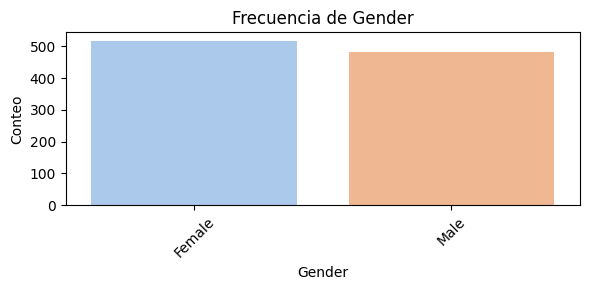


 Análisis descriptivo categórico: race/ethnicity
race/ethnicity
Group C    319
Group D    262
Group B    190
Group E    140
Group A     89
Name: count, dtype: int64


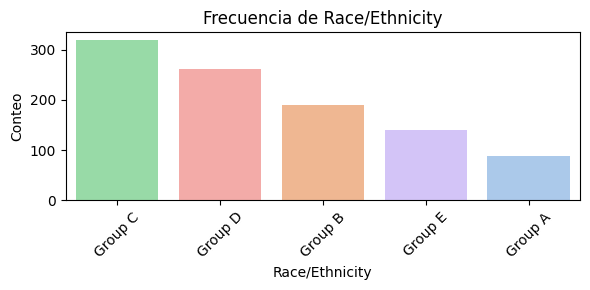


 Análisis descriptivo categórico: lunch
lunch
Standard        645
Free/Reduced    355
Name: count, dtype: int64


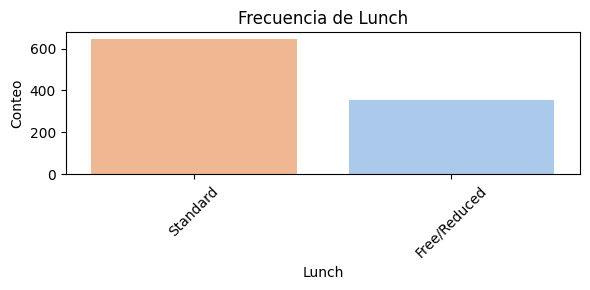


 Análisis descriptivo categórico: test preparation course
test preparation course
None         642
Completed    358
Name: count, dtype: int64


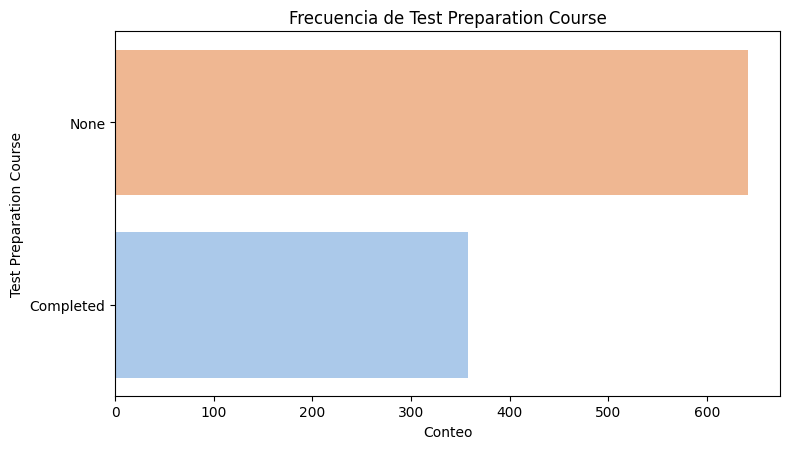


 Análisis descriptivo categórico: parental level of education
parental level of education
Some College          226
Associate'S Degree    222
High School           196
Some High School      179
Bachelor'S Degree     118
Master'S Degree        59
Name: count, dtype: int64


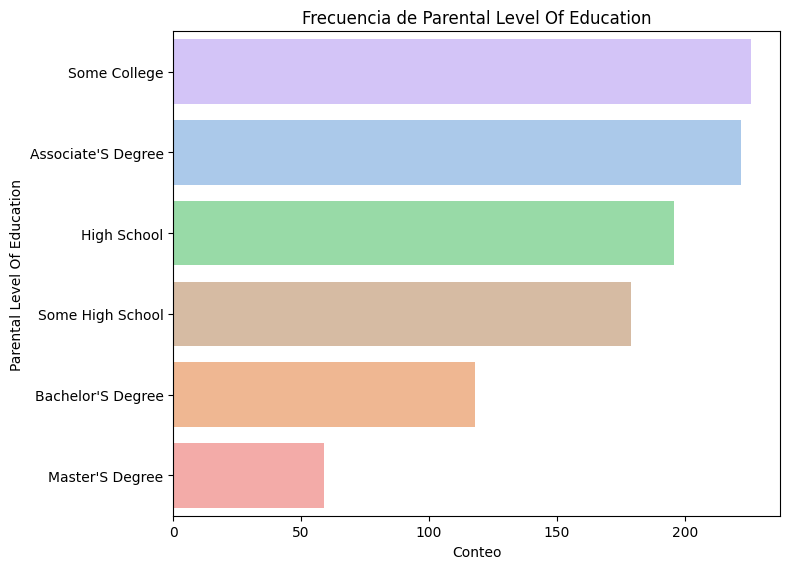

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar nombres limpios
df.columns = df.columns.str.strip()

# Variables categóricas
categoricas_verticales = ['gender', 'race/ethnicity', 'lunch']
categoricas_horizontales = ['test preparation course', 'parental level of education']

# Análisis con gráficos de barras VERTICALES
for col in categoricas_verticales:
    print(f"\n Análisis descriptivo categórico: {col}")
    print(df[col].value_counts())

    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, hue=col,
                  order=df[col].value_counts().index,
                  palette='pastel', legend=False)
    plt.title(f'Frecuencia de {col.title()}')
    plt.xlabel(col.title())
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Análisis con gráficos de barras HORIZONTALES
for col in categoricas_horizontales:
    print(f"\n Análisis descriptivo categórico: {col}")
    print(df[col].value_counts())

    plt.figure(figsize=(8, 4 + len(df[col].unique()) * 0.3))  # Altura dinámica
    sns.countplot(data=df, y=col, hue=col,
                  order=df[col].value_counts().index,
                  palette='pastel', legend=False)
    plt.title(f'Frecuencia de {col.title()}')
    plt.xlabel('Conteo')
    plt.ylabel(col.title())
    plt.tight_layout()
    plt.show()


**Tabla de frecuencia Nivel de Educación de los Padres**

In [ ]:
import pandas as pd
# Variable categórica a analizar
col = 'parental level of education'

# Tabla de frecuencia absoluta
frecuencia_abs = df[col].value_counts().sort_index()

# Frecuencia relativa (proporción)
frecuencia_rel = (frecuencia_abs / frecuencia_abs.sum()).round(3)

# Frecuencia acumulada
frecuencia_acum = frecuencia_abs.cumsum()

# Crear tabla resumen
tabla_frecuencia = pd.DataFrame({
    'Categoría': frecuencia_abs.index,
    'Frecuencia absoluta': frecuencia_abs.values,
    'Frecuencia relativa': frecuencia_rel.values,
    'Frecuencia acumulada': frecuencia_acum.values
})

# Mostrar la tabla
tabla_frecuencia


,Categoría,Frecuencia absoluta,Frecuencia relativa,Frecuencia acumulada
0,Associate'S Degree,222,0.222,222
1,Bachelor'S Degree,118,0.118,340
2,High School,196,0.196,536
3,Master'S Degree,59,0.059,595
4,Some College,226,0.226,821
5,Some High School,179,0.179,1000


**Tabla de Frecuencia para la variables test de prepación del curso**

In [ ]:
import pandas as pd
# Variable categórica a analizar
col = 'test preparation course'

# Tabla de frecuencia absoluta
frecuencia_abs = df[col].value_counts().sort_index()

# Frecuencia relativa (proporción)
frecuencia_rel = (frecuencia_abs / frecuencia_abs.sum()).round(3)

# Frecuencia acumulada
frecuencia_acum = frecuencia_abs.cumsum()

# Crear tabla resumen
tabla_frecuencia = pd.DataFrame({
    'Categoría': frecuencia_abs.index,
    'Frecuencia absoluta': frecuencia_abs.values,
    'Frecuencia relativa': frecuencia_rel.values,
    'Frecuencia acumulada': frecuencia_acum.values
})

# Mostrar la tabla
tabla_frecuencia


,Categoría,Frecuencia absoluta,Frecuencia relativa,Frecuencia acumulada
0,Completed,358,0.358,358
1,None,642,0.642,1000


**Tablas de Frecuencia variables numéricas**

In [ ]:
import pandas as pd

# Limpiar nombres de columnas
df.columns = df.columns.str.strip()

# Variables numéricas
numericas = ['math score', 'reading score', 'writing score']

# Número de clases (puedes ajustar según el rango)
num_clases = 6

for col in numericas:
    print(f"\n Tabla de frecuencias para: {col}")

    # Crear clases (intervalos) usando pd.cut
    clases = pd.cut(df[col], bins=num_clases)

    # Frecuencia absoluta
    frecuencia_abs = clases.value_counts().sort_index()

    # Frecuencia relativa
    frecuencia_rel = (frecuencia_abs / frecuencia_abs.sum()).round(3)

    # Frecuencia acumulada
    frecuencia_acum = frecuencia_abs.cumsum()

    # Crear tabla resumen
    tabla = pd.DataFrame({
        'Intervalo': frecuencia_abs.index.astype(str),
        'Frecuencia absoluta': frecuencia_abs.values,
        'Frecuencia relativa': frecuencia_rel.values,
        'Frecuencia acumulada': frecuencia_acum.values
    })

    # Mostrar tabla
    print(tabla)


 Tabla de frecuencias para: math score
          Intervalo  Frecuencia absoluta  Frecuencia relativa  \
0  (26.927, 39.167]                   32                0.032   
1  (39.167, 51.333]                  121                0.121   
2    (51.333, 63.5]                  266                0.266   
3    (63.5, 75.667]                  307                0.307   
4  (75.667, 87.833]                  195                0.195   
5   (87.833, 100.0]                   79                0.079   

   Frecuencia acumulada  
0                    32  
1                   153  
2                   419  
3                   726  
4                   921  
5                  1000  

 Tabla de frecuencias para: reading score
          Intervalo  Frecuencia absoluta  Frecuencia relativa  \
0  (28.929, 40.833]                   21                0.021   
1  (40.833, 52.667]                  102                0.102   
2    (52.667, 64.5]                  244                0.244   
3    (64.5, 76.333]

**Usando la regla de Sturges, para crear las clases de las variables numéricas**

In [ ]:
import pandas as pd
import numpy as np

# Variables numéricas
numericas = ['math score', 'reading score', 'writing score']

for col in numericas:
    print(f"\n Tabla de frecuencias para: {col}")

    # Calcular número de clases con regla de Sturges
    #n = df[col].count()
    #k = int(np.ceil(1 + np.log2(n)))  # Número de clases recomendado

    n = len(df)  # o cualquier tamaño de muestra
    k = int(np.ceil(1 + 3.33 * np.log10(n)))
    print(f"Número recomendado de clases según la fórmula 1 + 3.33*log10(n): {k}")

    # Crear intervalos
    clases = pd.cut(df[col], bins=k)

    # Frecuencia absoluta
    frecuencia_abs = clases.value_counts().sort_index()

    # Frecuencia relativa
    frecuencia_rel = (frecuencia_abs / frecuencia_abs.sum()).round(3)

    # Frecuencia acumulada
    frecuencia_acum = frecuencia_abs.cumsum()

    # Crear tabla resumen
    tabla = pd.DataFrame({
        'Intervalo': frecuencia_abs.index.astype(str),
        'Frecuencia absoluta': frecuencia_abs.values,
        'Frecuencia relativa': frecuencia_rel.values,
        'Frecuencia acumulada': frecuencia_acum.values
    })

    print(tabla)


 Tabla de frecuencias para: math score
Número recomendado de clases según la fórmula 1 + 3.33*log10(n): 11
           Intervalo  Frecuencia absoluta  Frecuencia relativa  \
0   (26.927, 33.636]                   12                0.012   
1   (33.636, 40.273]                   30                0.030   
2   (40.273, 46.909]                   46                0.046   
3   (46.909, 53.545]                  107                0.107   
4   (53.545, 60.182]                  136                0.136   
5   (60.182, 66.818]                  176                0.176   
6   (66.818, 73.455]                  173                0.173   
7   (73.455, 80.091]                  144                0.144   
8   (80.091, 86.727]                   81                0.081   
9   (86.727, 93.364]                   64                0.064   
10   (93.364, 100.0]                   31                0.031   

    Frecuencia acumulada  
0                     12  
1                     42  
2                 

**4.1.2. Relacionar variables (Bivariado)**

Algunas relaciones que son interesantes son:

1. Relación entre nivel educativo de los padres y el promedio de puntajes (math, reading, writing).

2. Comparar puntajes promedio según el género.

3. Impacto del curso de preparación (test preparation course) en las notas.

4. Comparar puntajes promedio por grupo étnico (race/ethnicity).



**1. Relación entre nivel educativo de los padres y el promedio de puntajes (math, reading, writing).**

  parental level of education  average_score
0          Associate'S Degree          69.63
1           Bachelor'S Degree          71.92
2                 High School          63.60
3             Master'S Degree          73.60
4                Some College          68.82
5            Some High School          65.78


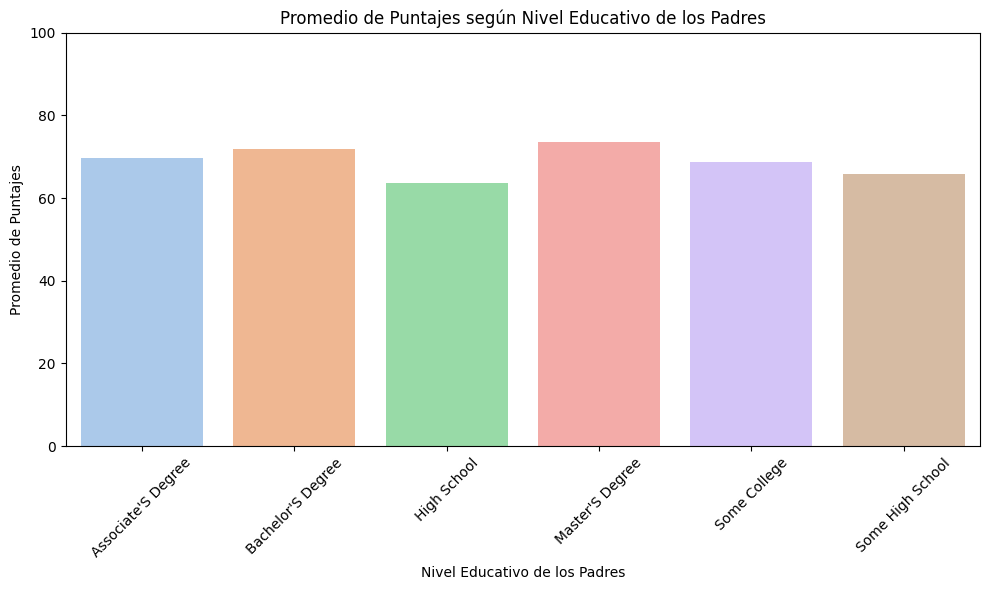

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear columna promedio de puntajes
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Análisis bivariado con groupby (promedio según nivel educativo y género)
#Promedio de Promedios
tabla_group = df.groupby(['parental level of education'])['average_score'].mean().round(2).reset_index()

print(tabla_group)


# Gráfico
plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x='parental level of education',
    y='average_score',
    palette='pastel',
    ci= None
)
plt.title('Promedio de Puntajes según Nivel Educativo de los Padres')
plt.xlabel('Nivel Educativo de los Padres')
plt.ylabel('Promedio de Puntajes')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

**2. Comparar puntajes promedio según el género.**

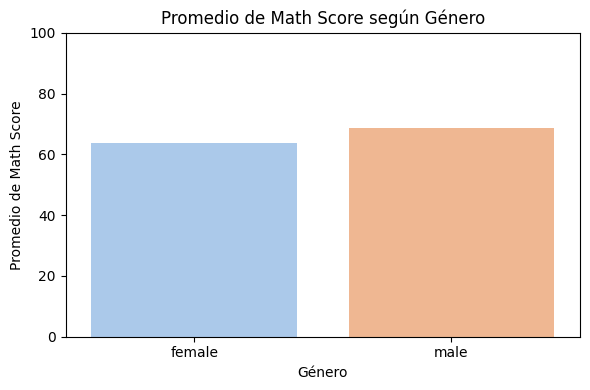

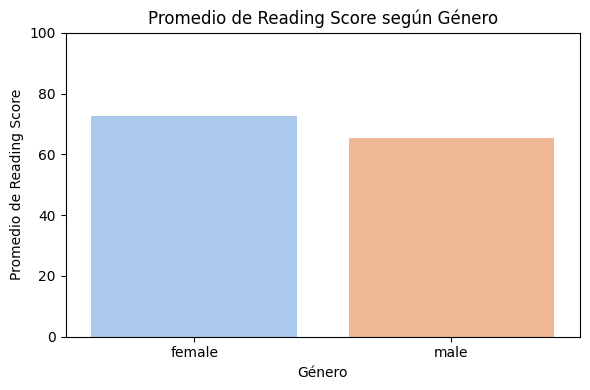

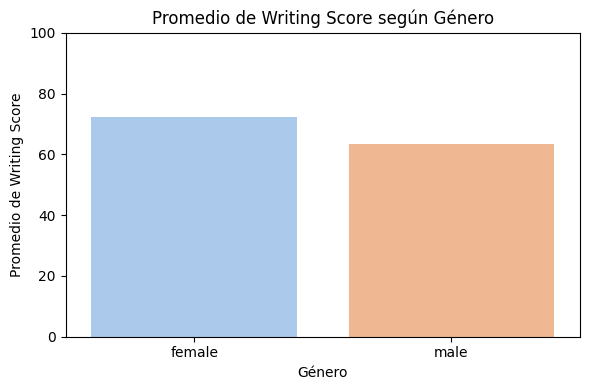

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de puntajes
puntajes = ['math score', 'reading score', 'writing score']

# Para cada puntaje, calcular promedio por género y graficar
for puntaje in puntajes:
    promedio_por_genero = df.groupby('gender')[puntaje].mean().reset_index()

    plt.figure(figsize=(6,4))
    sns.barplot(
        data=promedio_por_genero,
        x='gender',
        y=puntaje,
        palette='pastel'
    )
    plt.title(f'Promedio de {puntaje.title()} según Género')
    plt.xlabel('Género')
    plt.ylabel(f'Promedio de {puntaje.title()}')
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

math score | Grupo 'female': 6 outliers imputados con la media 64.20
math score | Grupo 'male': 2 outliers imputados con la media 68.90
reading score | Grupo 'female': 5 outliers imputados con la media 73.06
reading score | Grupo 'male': 3 outliers imputados con la media 65.73
writing score | Grupo 'female': 10 outliers imputados con la media 73.33
writing score | Grupo 'male': 2 outliers imputados con la media 63.50


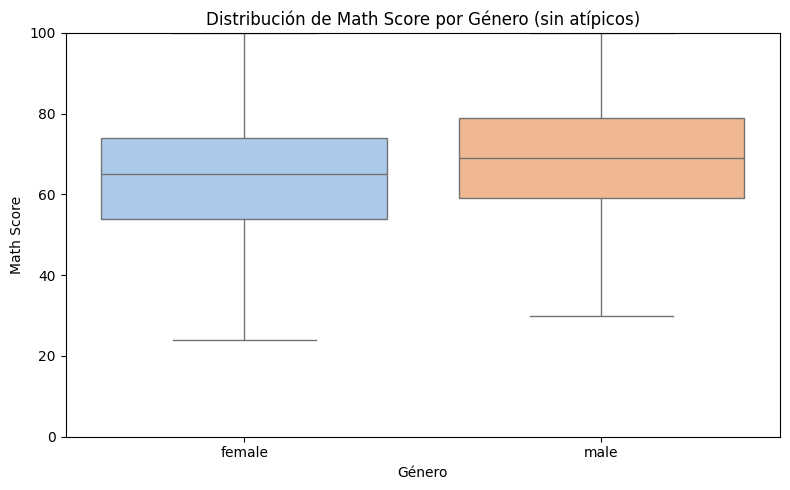

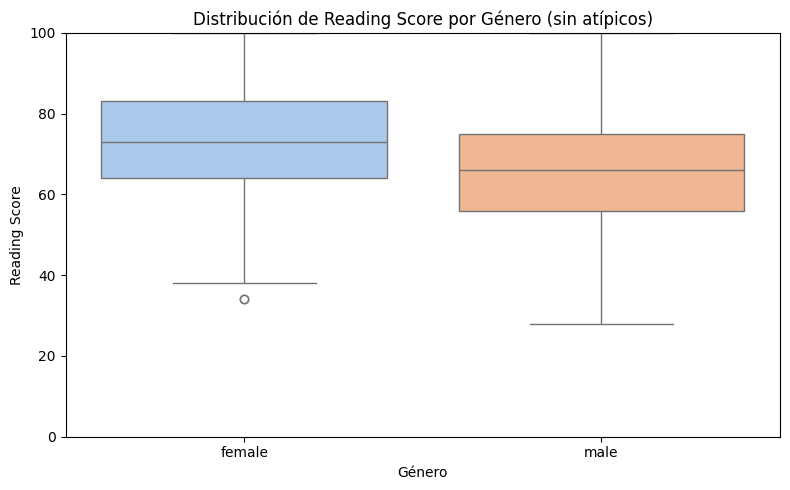

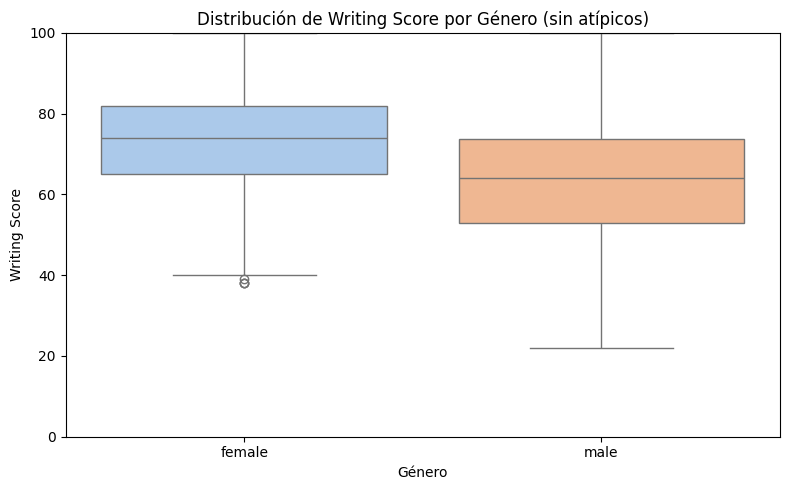

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('StudentsPerformance.csv')
df.columns = df.columns.str.strip()

# Variables numéricas a trabajar
puntajes = ['math score', 'reading score', 'writing score']

# Función para imputar outliers por grupo con la MEDIA
def imputar_outliers_por_grupo(df, variable, grupo):
    df_copy = df.copy()
    for g, datos_grupo in df.groupby(grupo):
        Q1 = datos_grupo[variable].quantile(0.25)
        Q3 = datos_grupo[variable].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR

        # Calcular la media del grupo sin outliers
        media = datos_grupo[(datos_grupo[variable] >= lim_inf) & (datos_grupo[variable] <= lim_sup)][variable].mean()

        # Identificar y reemplazar outliers por la media del grupo
        condicion = (df_copy[grupo] == g) & ((df_copy[variable] < lim_inf) | (df_copy[variable] > lim_sup))
        df_copy.loc[condicion, variable] = media
        print(f"{variable} | Grupo '{g}': {condicion.sum()} outliers imputados con la media {media:.2f}")

    return df_copy

# Aplicar la función para cada puntaje
for var in puntajes:
    df = imputar_outliers_por_grupo(df, var, 'gender')

# Visualizar resultados con boxplot
for puntaje in puntajes:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='gender', y=puntaje, palette='pastel')
    plt.title(f'Distribución de {puntaje.title()} por Género (sin atípicos)')
    plt.xlabel('Género')
    plt.ylabel(puntaje.title())
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

**3. Impacto del curso de preparación (test preparation course) en las notas.**


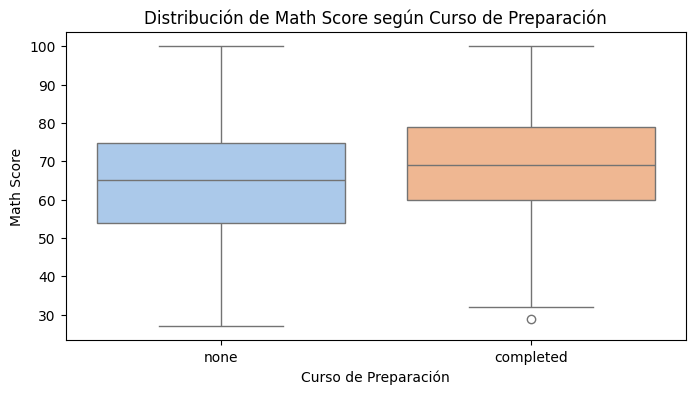

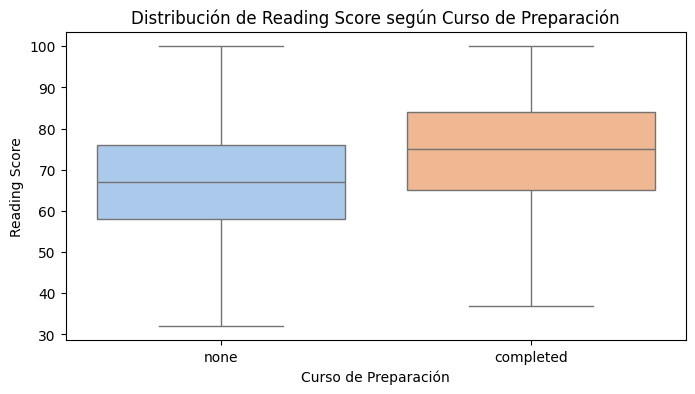

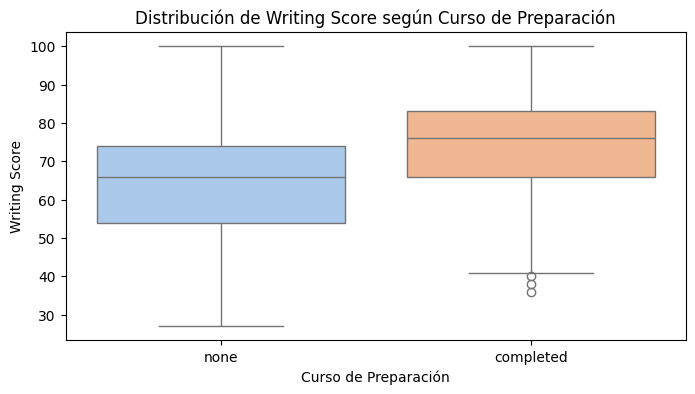

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

puntajes = ['math score', 'reading score', 'writing score']

for puntaje in puntajes:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='test preparation course', y=puntaje, palette='pastel')
    plt.title(f'Distribución de {puntaje.title()} según Curso de Preparación')
    plt.xlabel('Curso de Preparación')
    plt.ylabel(puntaje.title())
    plt.show()

**Imputación por la mediana en grupos**

math score | Grupo 'completed': 0 outliers imputados con mediana 69.00
math score | Grupo 'none': 0 outliers imputados con mediana 64.48
reading score | Grupo 'completed': 0 outliers imputados con mediana 75.00
reading score | Grupo 'none': 0 outliers imputados con mediana 67.00
writing score | Grupo 'completed': 0 outliers imputados con mediana 76.00
writing score | Grupo 'none': 0 outliers imputados con mediana 65.00


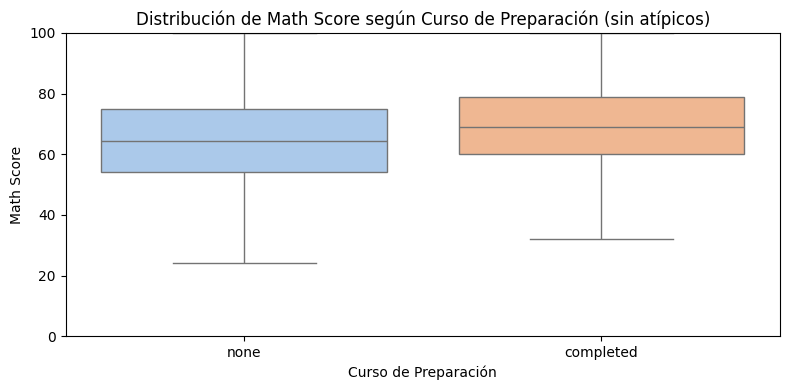

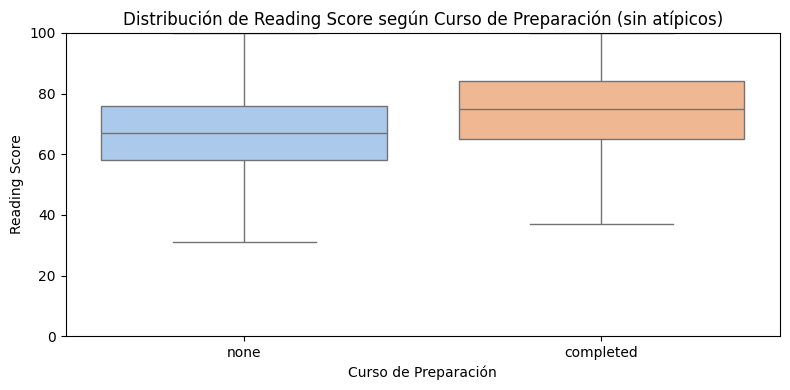

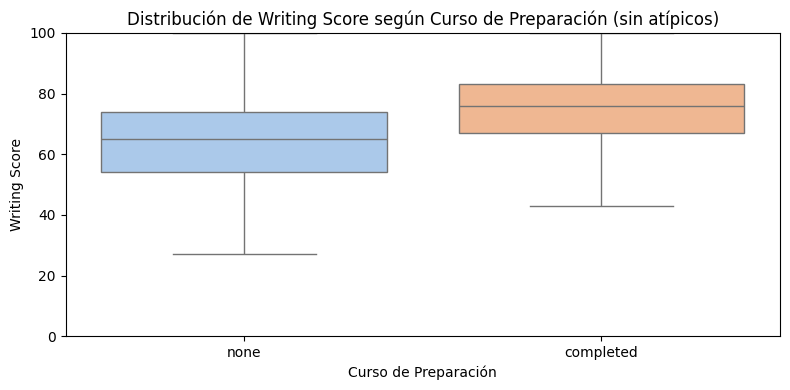

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numéricas y grupo
puntajes = ['math score', 'reading score', 'writing score']
grupo = 'test preparation course'

# Función para detectar e imputar outliers con la **mediana** por grupo
def imputar_outliers_por_grupo(df, variable, grupo):
    df_copy = df.copy()
    for g, datos_grupo in df.groupby(grupo):
        Q1 = datos_grupo[variable].quantile(0.25)
        Q3 = datos_grupo[variable].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR
        mediana = datos_grupo[(datos_grupo[variable] >= lim_inf) & (datos_grupo[variable] <= lim_sup)][variable].median()

        # Imputar valores atípicos con la **mediana**
        condicion = (df_copy[grupo] == g) & ((df_copy[variable] < lim_inf) | (df_copy[variable] > lim_sup))
        df_copy.loc[condicion, variable] = mediana
        print(f"{variable} | Grupo '{g}': {condicion.sum()} outliers imputados con mediana {mediana:.2f}")

    return df_copy

# Aplicar a cada puntaje
for var in puntajes:
    df = imputar_outliers_por_grupo(df, var, grupo)

# Boxplots sin atípicos
for puntaje in puntajes:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=grupo, y=puntaje, palette='pastel')
    plt.title(f'Distribución de {puntaje.title()} según Curso de Preparación (sin atípicos)')
    plt.xlabel('Curso de Preparación')
    plt.ylabel(puntaje.title())
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

**Imputación por la mediana en grupos**

math score | Grupo 'completed': 0 outliers imputados con mediana 69.00
math score | Grupo 'none': 0 outliers imputados con mediana 64.48
reading score | Grupo 'completed': 0 outliers imputados con mediana 75.00
reading score | Grupo 'none': 2 outliers imputados con mediana 67.00
writing score | Grupo 'completed': 2 outliers imputados con mediana 76.00
writing score | Grupo 'none': 0 outliers imputados con mediana 65.00


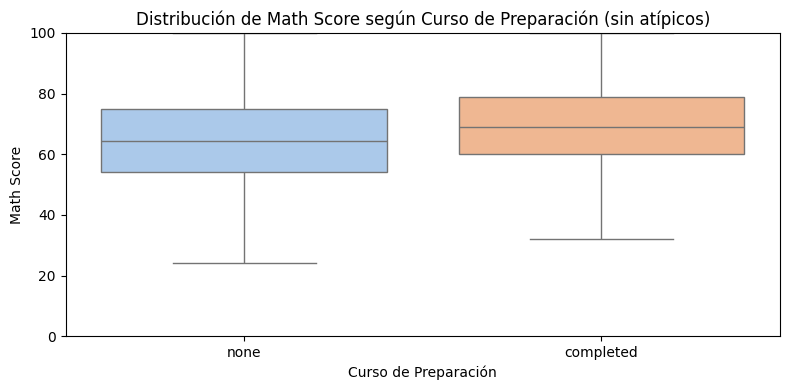

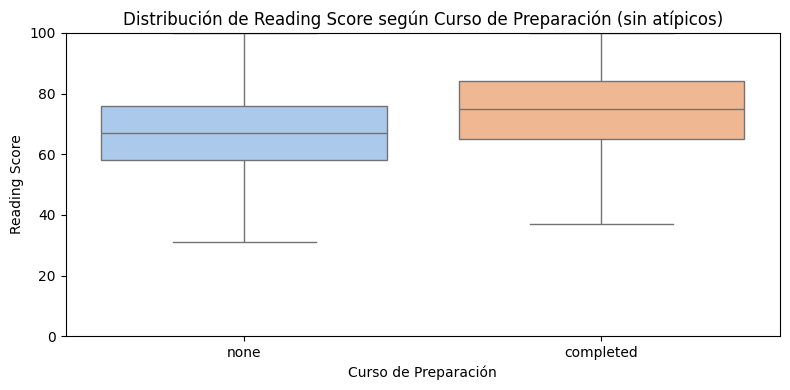

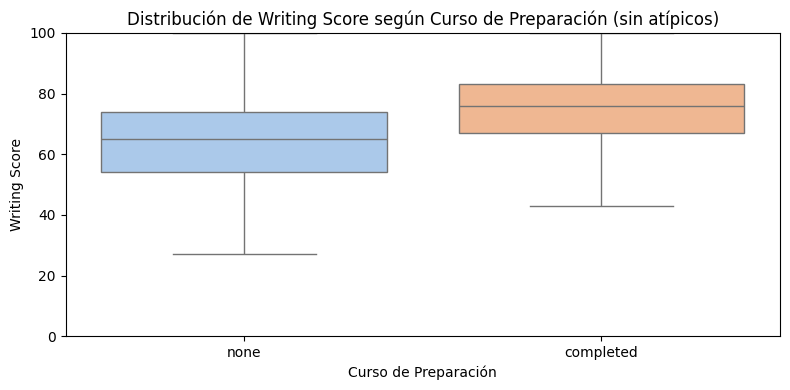

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numéricas y grupo
puntajes = ['math score', 'reading score', 'writing score']
grupo = 'test preparation course'

# Función para detectar e imputar outliers con la MEDIANA por grupo
def imputar_outliers_por_grupo(df, variable, grupo):
    df_copy = df.copy()
    for g, datos_grupo in df.groupby(grupo):
        Q1 = datos_grupo[variable].quantile(0.25)
        Q3 = datos_grupo[variable].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR
        mediana = datos_grupo[(datos_grupo[variable] >= lim_inf) & (datos_grupo[variable] <= lim_sup)][variable].median()

        # Imputar valores atípicos con la mediana
        condicion = (df_copy[grupo] == g) & ((df_copy[variable] < lim_inf) | (df_copy[variable] > lim_sup))
        df_copy.loc[condicion, variable] = mediana
        print(f"{variable} | Grupo '{g}': {condicion.sum()} outliers imputados con mediana {mediana:.2f}")

    return df_copy

# Aplicar a cada puntaje
for var in puntajes:
    df = imputar_outliers_por_grupo(df, var, grupo)

# Boxplots sin atípicos
for puntaje in puntajes:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=grupo, y=puntaje, palette='pastel')
    plt.title(f'Distribución de {puntaje.title()} según Curso de Preparación (sin atípicos)')
    plt.xlabel('Curso de Preparación')
    plt.ylabel(puntaje.title())
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

**4. Comparar puntajes promedio por grupo étnico (race/ethnicity).**


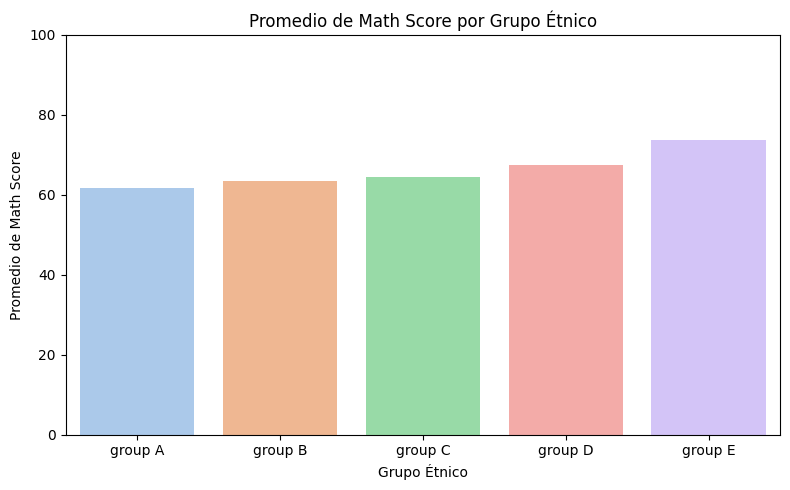

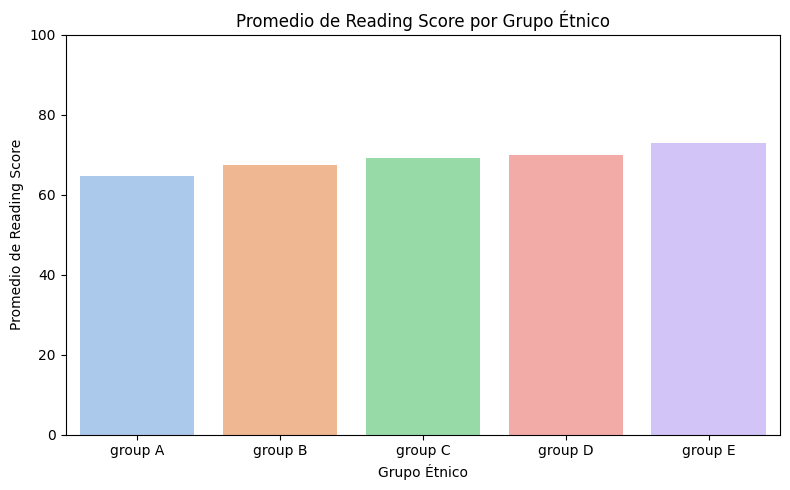

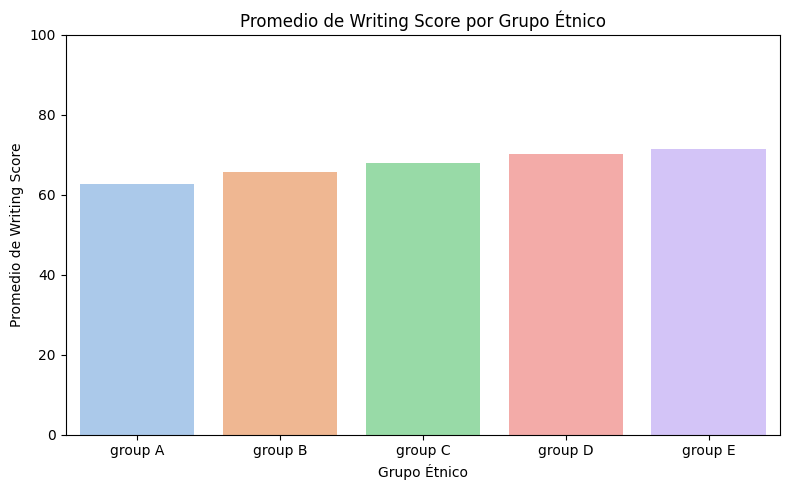

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de puntajes
puntajes = ['math score', 'reading score', 'writing score']

# Para cada puntaje, calcular promedio por grupo étnico y graficar
for puntaje in puntajes:
    promedio_por_etnia = df.groupby('race/ethnicity')[puntaje].mean().reset_index()

    plt.figure(figsize=(8,5))
    sns.barplot(
        data=promedio_por_etnia,
        x='race/ethnicity',
        y=puntaje,
        palette='pastel',
        order=sorted(df['race/ethnicity'].unique())  # Opcional: orden alfabético
    )
    plt.title(f'Promedio de {puntaje.title()} por Grupo Étnico')
    plt.xlabel('Grupo Étnico')
    plt.ylabel(f'Promedio de {puntaje.title()}')
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

**4.2. Análisis Multivariado**

                            math score            reading score             \
test preparation course      completed       none     completed       none   
parental level of education                                                  
associate's degree           71.829268  65.571429     76.170732  67.857143   
bachelor's degree            73.282609  66.902778     76.739130  70.611111   
high school                  65.000000  60.992857     67.839286  63.450000   
master's degree              70.600000  69.307692     78.250000  73.897436   
some college                 71.454545  64.892617     75.987013  66.087248   
some high school             66.701299  61.078431     70.948052  63.911765   

                            writing score             
test preparation course         completed       none  
parental level of education                           
associate's degree              76.817073  65.842857  
bachelor's degree               78.695652  69.986111  
high school           

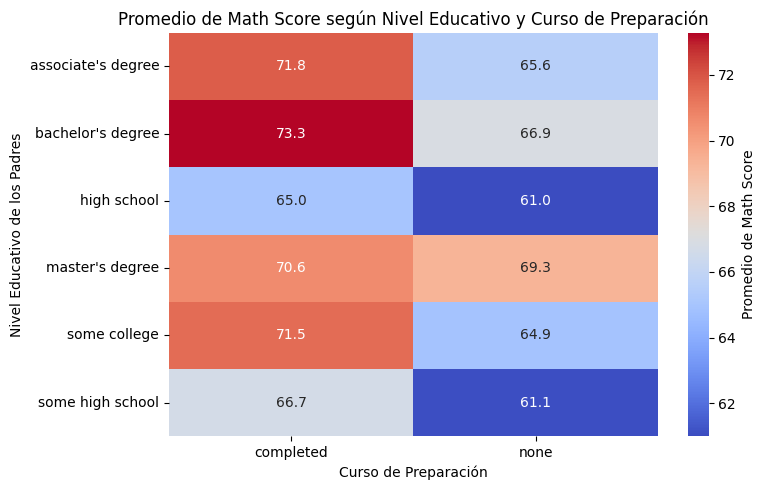

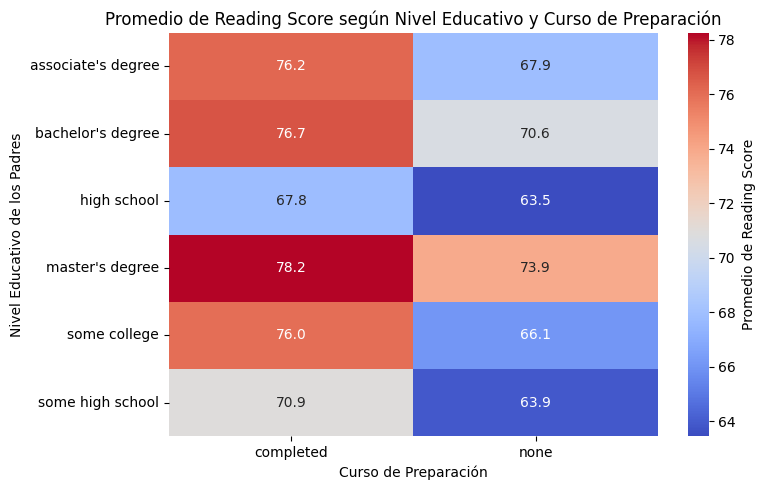

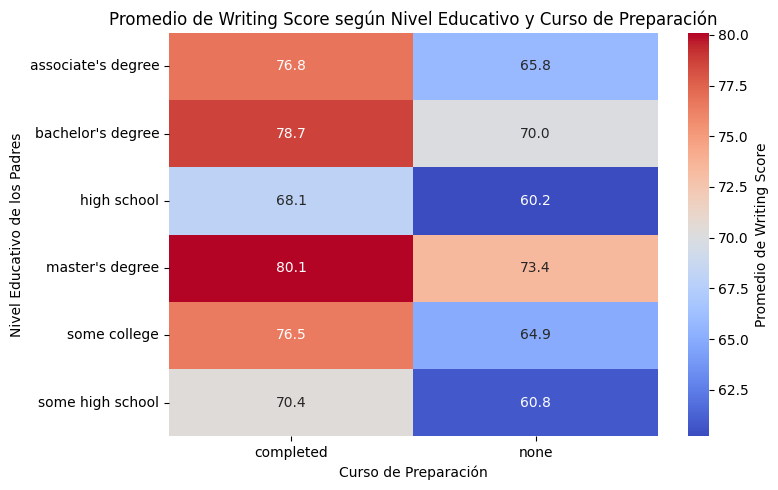

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la tabla pivote
tabla_pivot = df.pivot_table(
    index='parental level of education',
    columns='test preparation course',
    values=numericas,
    aggfunc='mean'
)

print(tabla_pivot)

# Graficar heatmap para cada puntaje
for puntaje in numericas:
    plt.figure(figsize=(8, 5))
    sns.heatmap(
        tabla_pivot[puntaje],
        annot=True,
        fmt=".1f",
        cmap='coolwarm',
        cbar_kws={'label': f'Promedio de {puntaje.title()}'}
    )
    plt.title(f'Promedio de {puntaje.title()} según Nivel Educativo y Curso de Preparación')
    plt.ylabel('Nivel Educativo de los Padres')
    plt.xlabel('Curso de Preparación')
    plt.tight_layout()
    plt.show()


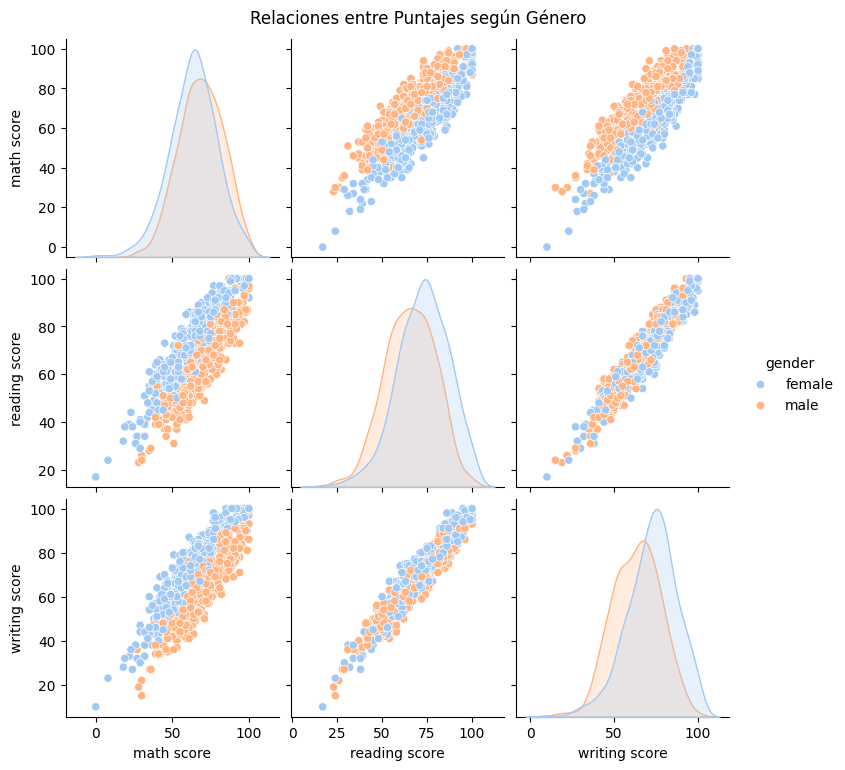

In [ ]:
sns.pairplot(df, vars=numericas, hue='gender', palette='pastel')
plt.suptitle('Relaciones entre Puntajes según Género', y=1.02)
plt.show()